In [1]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
# Simulation 1
# In a frame rotating with frequency of the incident field (Rotating Wave approximation)

In [4]:
# Assumptions

# Angle of incidence = 0 (thus, no effect of polarization)
# Incident light is monochromatic

# Considering non-interacting exciton system

In [21]:
# Constants

# h_bar = 1 (convention)
c = 1

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame
k = 0                        # TMD in-plane momentum
m = 1                        # Mass of exciton

Npr = 5             # Number of cavity fock states for right moving modes
Npl = 5             # Number of cavity fock states for left moving modes
Ne = 5              # Number of exciton fock states

# Essential Operators

r  = tensor(destroy(Npr), qeye(Ne), qeye(Npl))       # Ladder operator of Right propagating field
l  = tensor(qeye(Npr), qeye(Ne), destroy(Npl))       # Ladder operator of Left propagating field

# x = tensor(qeye(Npr), destroy(Ne), qeye(Npl))      # Exciton ladder operator  

In [22]:
# Net Hamiltonian

def exc_rho1(g, w_ex, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    ne = np.max(ne) 
    
    return ne

def exc_rho2(g, w_ex, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex), (gamma**2 + (w_ex)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    ne = np.min(ne)
    
    return ne

In [23]:
w = 0 * 2 * np.pi

# Incident field properties
wp = 1.0  * 2 * np.pi  # Frequency (energy) of the incident field
    
g_vec = np.linspace(0.1,10,50)

ne_vec = []

for g in g_vec:
    
    beta = np.sqrt(3.5/g)
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne = exc_rho1(g, wp, gamma, beta)
    
    ne_vec.append(ne)

Text(0.5, 1, 'Occupational Probability w.r.t g')

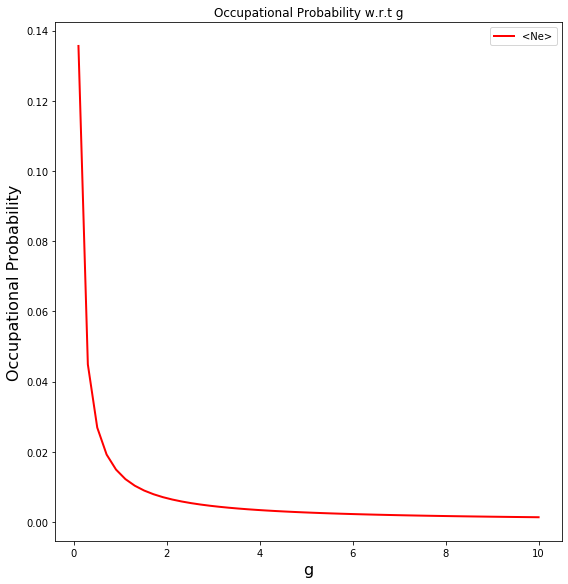

In [24]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(g_vec, ne_vec, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("g", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t g")

In [25]:
wp_vec = np.linspace(1,10,100) * 2 * np.pi

g = 1
beta = np.sqrt(3.5/g)

theta = np.pi/2

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

ri_expt = []

ne_expt1 = []
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2
print(np.max(rc1),np.max(rc2))

0.9903013246407808 0.4503524352040197


Text(0.5, 1, 'Occupational Probability w.r.t wp')

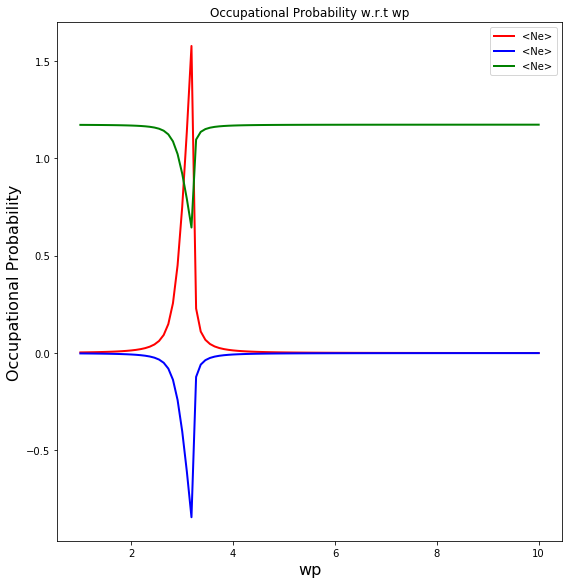

In [26]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), ne_expt2, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), xe_expt2, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), ro_expt2, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")

Text(0.5, 1, 'Occupational Probability w.r.t w')

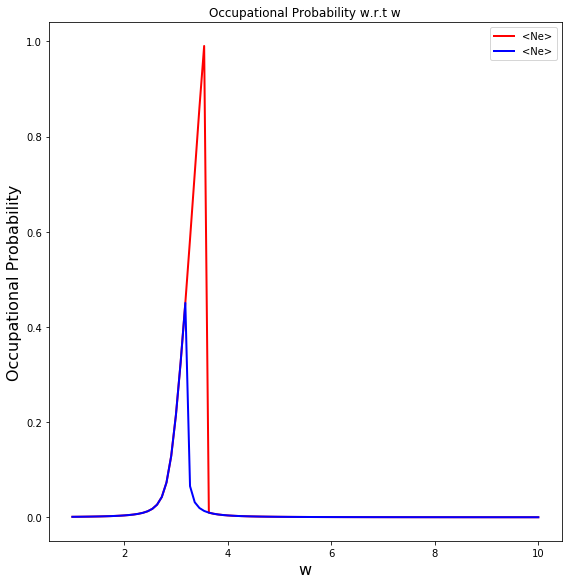

In [27]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), rc2, 'b', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")

In [28]:
wp_vec = np.linspace(1,10,100) * 2 * np.pi

g = -2
beta = np.sqrt(-3.5/g)

theta = np.pi/2

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

ri_expt = []

ne_expt1 = []
xe_expt1 = []
ro_expt1 = []

ne_expt2 = []
xe_expt2 = []
ro_expt2 = []

for wp in wp_vec:

    w_ex = we - wp
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * rho
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)

    ne1 = exc_rho1(g, w_ex, gamma, beta)
    G01 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    xe1 = -1j * np.exp(-1j * theta) * gamma * beta * G01
    r_out1 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe1
    ne_expt1.append(ne1)
    xe_expt1.append(xe1)
    ro_expt1.append(r_out1)
    
    ne2 = exc_rho2(g, w_ex, gamma, beta)
    G02 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    xe2 = -1j * np.exp(-1j * theta) * gamma * beta * G02
    r_out2 = beta * np.sqrt(gamma) -1j * np.exp(1j*theta) * np.sqrt(gamma) * xe2
    ne_expt2.append(ne2)
    xe_expt2.append(xe2)
    ro_expt2.append(r_out2)
    
    
    ri_expt.append(beta * np.sqrt(gamma))


rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2
print(np.max(rc1),np.max(rc2))

0.9903013246407418 0.4503524352040204


Text(0.5, 1, 'Occupational Probability w.r.t wp')

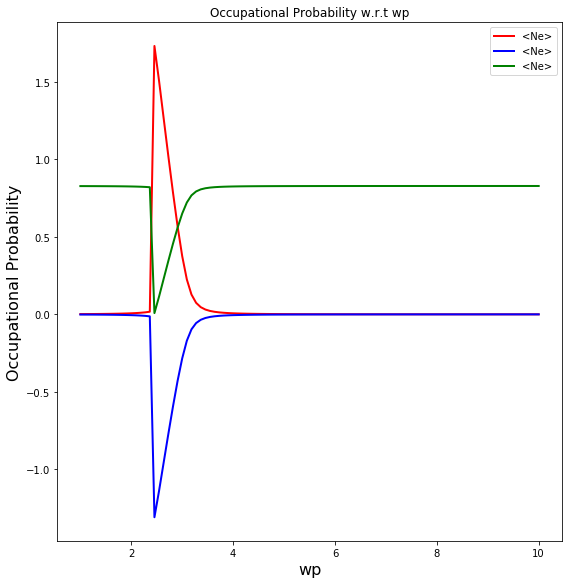

In [29]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), ne_expt1, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), xe_expt1, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), ro_expt1, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")

Text(0.5, 1, 'Occupational Probability w.r.t wp')

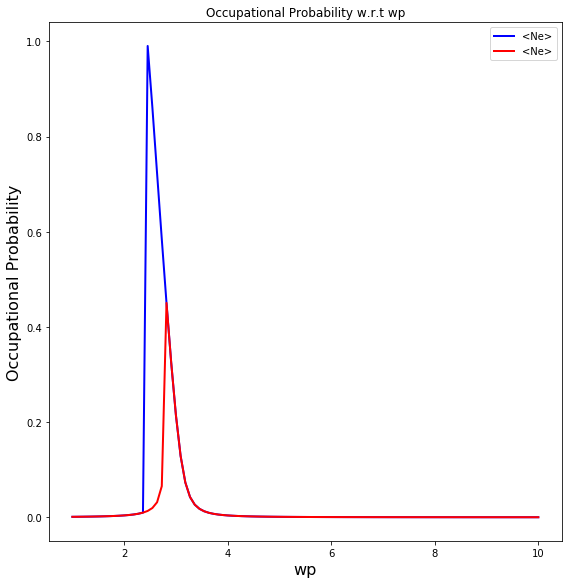

In [30]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), rc2, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t wp")

In [269]:
def G_(w, k, w_ex, ne, g):
    
    if k == 0:
        G_ = 1/(gamma - 1j*(w - (w_ex + g * ne)))
    else:
        G_ = 1/(gamma - 1j*(w - (w_ex + 2 * g * ne)))
    
    return G_

def G(w, k, w_ex, ne,g):
    
    G = np.conj(1/G_(-1*w,-1*k,w_ex,ne,g))/((1/G_(w,k,w_ex,ne,g)) * np.conj(1/G_(-1*w,-1*k,w_ex,ne,g)) - np.abs(-1j*g*ne)**2)
    
    return G

def rin(w,k,wp):

    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    r_in = np.sqrt(rho) * r
    
    return r_in

def lin(w,k,wp):

    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    l_in = np.sqrt(rho) * l
    
    return l_in

def n(w,k,wp):
    
    n = rin(w,k,wp) + lin(w,k,wp)
    
    return n

In [292]:
# Net Hamiltonian

def Hamiltonian(g, k, wp, K, theta):
    
    w_ex = we + (k ** 2)/m - wp  # Frequency (energy) of the exciton in the Rotating frame

    # Rotating frame normalization
    rho = ((w + wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K =  K * rho                            # Rotating frame normalization
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)
    
    ne = exc_rho1(g, w_ex, gamma, beta)

    # Essential Operators 
    
    # Exciton ladder operator
    x = -1j * (np.exp(-1j*theta) * np.sqrt(gamma)) * G(w,k,w_ex,ne,g)
    x = x * (n(w,k,wp) + (-1j*g*ne) * np.conj(G_(-1*w,-1*k,w_ex,ne,g)) * n(-1*w,-1*k,wp).dag())
    
    # Normalizing Right (Left) ladder operator
    r_in = np.sqrt(rho) * r
    l_in = np.sqrt(rho) * l
    
    # Output operators for Right (Left) Propagating field
    r_out = (1-gamma*G(w,k,w_ex,ne,g))*rin(w,k,wp) + (gamma*G(w,k,w_ex,ne,g)*(-1j*g*ne)*np.conj(G_(-1*w,-1*k,w_ex,ne,g)))*rin(-1*w,-1*k,wp).dag()
    r_out = r_out + (gamma*G(w,k,w_ex,ne,g))*lin(w,k,wp) + (1- gamma*G(w,k,w_ex,ne,g)*(-1j*g*ne)*np.conj(G_(-1*w,-1*k,w_ex,ne,g)))*lin(-1*w,-1*k,wp).dag()

    # Number operators
    ne_op = x.dag() * x              # Exciton number operator

    nr_in = rin(w,k,wp).dag() * rin(w,k,wp)     # Right--in number operator
    nr_out = rin(w,k,wp).dag() * rin(w,k,wp)  # Right--out number operator
    
    return ne_op, nr_in, nr_out, r_in, r_out

In [297]:
# Coherent Monochromatic Incident EM field
psi = tensor(coherent(N=5, alpha=1.0), fock(5, 0), fock(5, 0)) 

wp_vec = np.linspace(1, 5.0, 101) * 2 * np.pi   # Frequency vector

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

g = 1
beta = 1
k = 0

K = 0.25                                       # Coupling strength
theta = np.pi/2                                # Coupling phase 

ne_expt = []
nri_expt = []
nro_expt = []

ri_expt = []
ro_expt = []

for wp in wp_vec:
    
    ne_op, nr_in, nr_out, r_in, r_out = Hamiltonian(g, k, wp, K, theta)
    
    ne_op = expect(ne_op, psi)
    ne_expt.append(e)
    
    nri = expect(nr_in, psi)      # Right-in photon occupation probability
    nri_expt.append(nri)
    
    nro = expect(nr_out, psi)     # Right-out photon occupation probability
    nro_expt.append(nro)          

    roe = expect(r_out, psi)      # Right-out photon expectation value
    ro_expt.append(roe)
    
    rie = expect(r_in, psi)       # Right-in photon expectation value
    ri_expt.append(rie)

Text(0.5, 1, 'Expectation value of Coherent Incident field w.r.t wp')

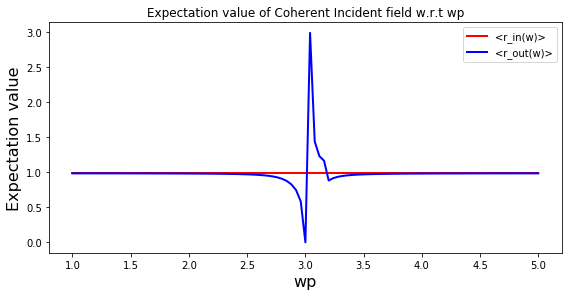

In [298]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(wp_vec/(2*np.pi), ri_expt, 'r', linewidth=2, label="<r_in(w)>")
axes.plot(wp_vec/(2*np.pi), ro_expt, 'b', linewidth=2, label="<r_out(w)>")
axes.set_ylabel("Expectation value", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Expectation value of Coherent Incident field w.r.t wp")

In [299]:
# Reflection Coefficient 
# RC = gamma * G(w,k)  (k=0 here)
# Can be calculated by taking expectation value of Eq(8)

rc = np.abs((np.array(ri_expt) - np.array(ro_expt))/(np.array(ri_expt)))**2
print(np.max(rc))
print(wp_vec[np.argmax(rc)]/(2*np.pi))

5.833943174867355
3.0399999999999996


Text(0.5, 1, ' Reflection Coefficient w.r.t wp')

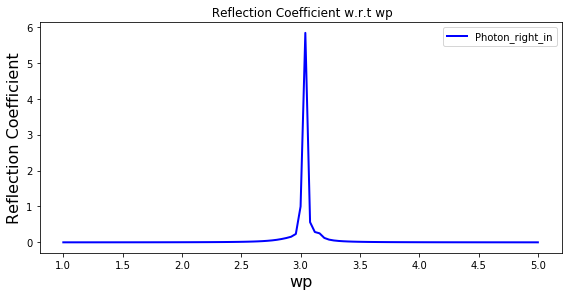

In [300]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(wp_vec/(2*np.pi), rc, 'b', linewidth=2, label="Photon_right_in")
axes.set_ylabel("Reflection Coefficient", fontsize=16)
axes.set_xlabel("wp", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title(" Reflection Coefficient w.r.t wp")